In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
walmart_df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DS & ML/Projects/Walmart-CLT&Confidence level/walmart case.xlsx')

In [ ]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [ ]:
walmart_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

In [ ]:
walmart_df.drop(index=33672,inplace=True)

## 1.Problem statement

**By analyzing the sample data we have to estimate the average 
purchase cost done by individual on the total population. Apart from that we have to check the average purchasing varies or not w.r.t any particular category like  gender or  age**

###a. Shape of data,data types,statistical summary

In [ ]:
walmart_df.shape

(33672, 10)

In [ ]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33672 entries, 0 to 33671
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     33672 non-null  int64  
 1   Product_ID                  33672 non-null  object 
 2   Gender                      33672 non-null  object 
 3   Age                         33672 non-null  object 
 4   Occupation                  33672 non-null  float64
 5   City_Category               33672 non-null  object 
 6   Stay_In_Current_City_Years  33672 non-null  object 
 7   Marital_Status              33672 non-null  float64
 8   Product_Category            33672 non-null  float64
 9   Purchase                    33672 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 2.8+ MB


In [ ]:
walmart_df.groupby(['Gender'])['User_ID'].nunique()

Gender
F    1209
M    3348
Name: User_ID, dtype: int64

In [ ]:
print('The Unique values are:')
for col in walmart_df.columns:
  print(f" {col} - '{len(walmart_df[col].unique())}'")

The Unique values are:
 User_ID - '4557'
 Product_ID - '2946'
 Gender - '2'
 Age - '7'
 Occupation - '21'
 City_Category - '3'
 Stay_In_Current_City_Years - '5'
 Marital_Status - '2'
 Product_Category - '18'
 Purchase - '10328'


From the above analysis the categorical columns are 
1. Gender, 
2. Age,
3. Occupation, 
4. City_Category, 
5. Stay_In_Current_City_Years, 
6. Marital_Status, 
7. Product_Categeory 

In [ ]:
categorical_columns=["Gender","Age",'Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']

for i in categorical_columns:
  walmart_df[i]=walmart_df[i].astype('category')

In [ ]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33672 entries, 0 to 33671
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User_ID                     33672 non-null  int64   
 1   Product_ID                  33672 non-null  object  
 2   Gender                      33672 non-null  category
 3   Age                         33672 non-null  category
 4   Occupation                  33672 non-null  category
 5   City_Category               33672 non-null  category
 6   Stay_In_Current_City_Years  33672 non-null  category
 7   Marital_Status              33672 non-null  category
 8   Product_Category            33672 non-null  category
 9   Purchase                    33672 non-null  float64 
dtypes: category(7), float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
walmart_df.describe()

,User_ID,Purchase
count,3.367200e+04,33672.000000
mean,1.002596e+06,9264.410252
std,1.486853e+03,4945.043197
min,1.000001e+06,185.000000
25%,1.001294e+06,5845.000000
50%,1.002621e+06,8046.000000
75%,1.003885e+06,12021.250000
max,1.005166e+06,23958.000000


In [ ]:
# walmart_df=walmart_df[~(walmart_df['Purchase']>21000)]

In [ ]:
walmart_df.describe(include='category')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,33672,33672,33672.0,33672,33672,33672.0,33672.0
unique,2,7,21.0,3,5,2.0,18.0
top,M,26-35,4.0,B,1,0.0,5.0
freq,25839,13258,4489.0,14467,11863,20069.0,9473.0


###b. Non Graphical analysis

In [ ]:
for i in walmart_df[categorical_columns]:
  print(walmart_df[i].value_counts())
  print('_____________')


M    25839
F     7833
Name: Gender, dtype: int64
_____________
26-35    13258
36-45     6849
18-25     6227
46-50     2739
51-55     2416
55+       1333
0-17       850
Name: Age, dtype: int64
_____________
4.0     4489
0.0     4193
7.0     3507
17.0    2549
1.0     2501
20.0    2112
12.0    1899
14.0    1726
2.0     1654
16.0    1607
6.0     1278
3.0     1181
10.0     758
5.0      732
15.0     727
11.0     707
19.0     557
13.0     527
18.0     471
9.0      400
8.0       97
Name: Occupation, dtype: int64
_____________
B    14467
C    10385
A     8820
Name: City_Category, dtype: int64
_____________
1     11863
2      6159
3      5852
4+     5080
0      4718
Name: Stay_In_Current_City_Years, dtype: int64
_____________
0.0    20069
1.0    13603
Name: Marital_Status, dtype: int64
_____________
5.0     9473
1.0     8536
8.0     7066
11.0    1582
2.0     1455
3.0     1242
6.0     1234
4.0      706
16.0     583
15.0     392
13.0     326
10.0     302
12.0     230
7.0      202
18.0     183
14.0

1. Men are more than Women

2. 26-35 age group is more and 0-17 is the least

3. Occupation code of 4,0 are the highest

4. B City is the highest

5. In the category of stay in current city in years is more of =1 year people

6. Singles are more compared to married

7. Product category of 5 is the highest selling category 

###c. Visual Analysis

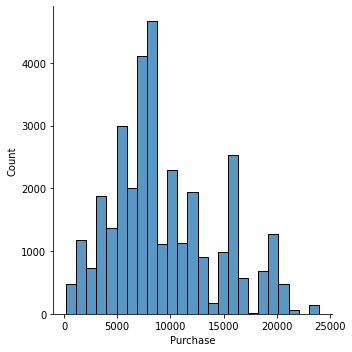

In [ ]:
sns.displot(walmart_df['Purchase'],bins=25)
plt.show()

**Purchase cost of 7000-8000 and 8000-9000 is more in number**

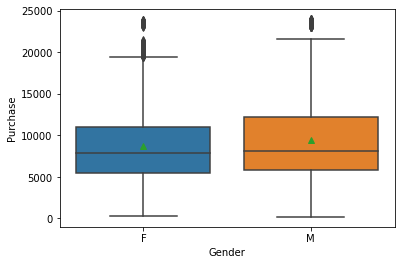

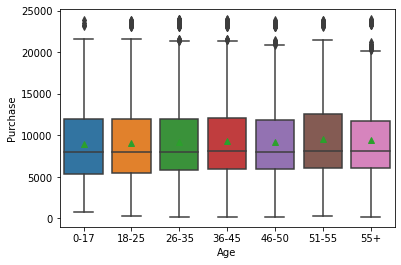

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


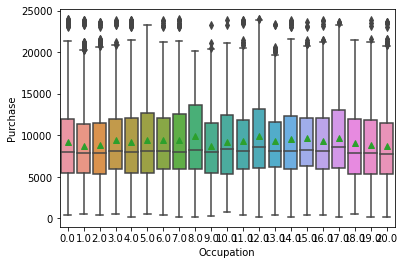

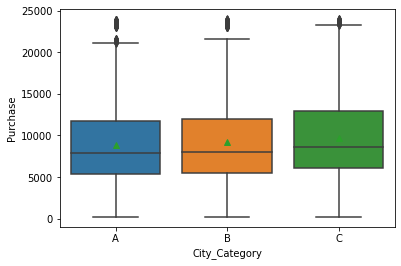

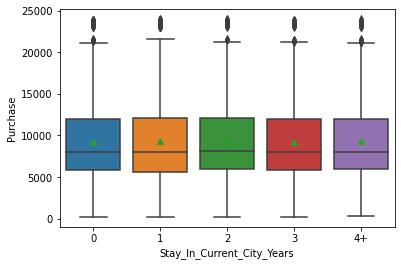

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


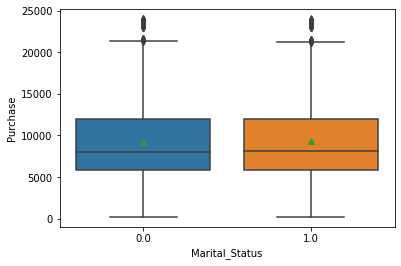

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


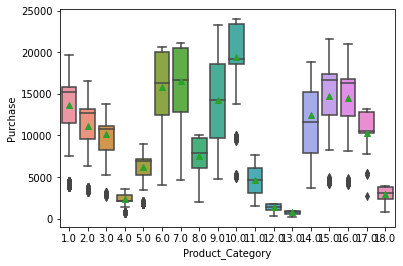

In [ ]:
for i in categorical_columns:
  sns.boxplot(x=i,y='Purchase',data=walmart_df,showmeans=True)
  plt.show()

**AVERAGE Purchase cost is higher for men, 51-55 age group, for Occupation code 8, for city category C, for 2 yrs stay in current city, for people who are married and for the product catgegory 10.**

In [ ]:
for i in categorical_columns:
  print(walmart_df.groupby([i])['Purchase'].mean().sort_values())
  

Gender
F    8745.042257
M    9421.854793
Name: Purchase, dtype: float64
Age
0-17     8999.978824
18-25    9131.510358
46-50    9141.683461
26-35    9249.028511
36-45    9370.483720
55+      9378.336834
51-55    9559.961921
Name: Purchase, dtype: float64
Occupation
1.0     8683.475010
20.0    8705.574337
9.0     8706.290000
2.0     8815.582225
19.0    8854.849192
18.0    9017.802548
0.0     9153.857143
10.0    9232.050132
4.0     9237.604589
11.0    9292.625177
16.0    9334.503423
13.0    9353.777989
3.0     9391.485182
5.0     9404.459016
7.0     9471.495580
6.0     9488.383412
14.0    9511.931054
15.0    9631.872077
17.0    9723.857591
12.0    9885.604529
8.0     9899.154639
Name: Purchase, dtype: float64
City_Category
A    8862.835488
B    9162.788208
C    9747.034762
Name: Purchase, dtype: float64
Stay_In_Current_City_Years
0     9166.781899
3     9220.005981
4+    9266.192717
1     9283.709348
2     9342.745088
Name: Purchase, dtype: float64
Marital_Status
0.0    9240.085505
1.0   

##2.Missing values and Outliers

In [ ]:
walmart_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no null values and outliers

##3.Business Insights

**The Range of the variable and the stats of variables are shown aboove using describe function and all are categorical variables except the Purchase column. the distribution of Purchase is shown above and the most frequent purchasing happens in the interval of 7000-8000 and 8000-9000**

##4.Answering Questions

**From the above Analysis it was found that Men's purchasing average is more than Women's purchasing average**

In [ ]:
walmart_df['Gender'].value_counts()

M    25839
F     7833
Name: Gender, dtype: int64

### Confidence interval w.r.t Gender

**BOOTSTRAP**

In [ ]:
# Female customers sample mean

In [ ]:
lower_limit=np.mean(female_purchasers_sample_means)-np.std(female_purchasers_sample_means)*1.96
upper_limit=np.mean(female_purchasers_sample_means)+np.std(female_purchasers_sample_means)*1.96

In [ ]:
lower_limit,upper_limit

(8638.925666842346, 8851.586434523668)

In [ ]:
lower_limit=np.mean(female_purchasers_sample_means)-np.std(female_purchasers_sample_means)/np.sqrt(1000)*1.96
upper_limit=np.mean(female_purchasers_sample_means)+np.std(female_purchasers_sample_means)/np.sqrt(1000)*1.96

In [ ]:
lower_limit,upper_limit

(8741.893588708843, 8748.61851265717)

**The above one is from review class and I think its not correct as we are doing sqrt(n) as std deviation here is from sample means not from the population there is no need of doing it again**

In [ ]:
female_customers=walmart_df[walmart_df['Gender']=='F']

In [ ]:
female_purchasers_cost_details=(female_customers['Purchase'])

In [ ]:
size=1000
female_purchasers_sample_means=np.zeros(size)
for i in range(size):
  bootstrapped_sample=female_purchasers_cost_details.sample(female_customers.shape[0],replace=True)
  sample_mean=np.mean(bootstrapped_sample)
  female_purchasers_sample_means[i]=sample_mean

In [ ]:
type(female_purchasers_cost_details)

pandas.core.frame.DataFrame

**It doesnt matter whether it is df or series dataframe**

In [ ]:
confidence_interval=np.percentile(female_purchasers_sample_means,[2.5,97.5])
print(confidence_interval)

[8639.88345462 8853.95938657]


In [ ]:
# female_purchasers_sample_means

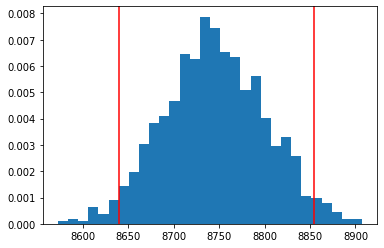

In [ ]:
plt.hist(female_purchasers_sample_means,bins=30,density=True)
plt.axvline(x=confidence_interval[0],c='r')
plt.axvline(x=confidence_interval[1],c='r')
plt.show()

**So, with 95% confidence we can say the femal population mean of purchase is in between 8645 to 8842**

In [ ]:
# Male customers sample mean

In [ ]:
male_customers=walmart_df[walmart_df['Gender']=='M']

In [ ]:
male_purchasers_cost_details=(male_customers[['Purchase']])

In [ ]:
size=1000
male_purchasers_sample_means=np.zeros(size)
for i in range(size):
  bootstrapped_sample=male_purchasers_cost_details.sample(male_customers.shape[0],replace=True)
  sample_mean=np.mean(bootstrapped_sample)
  male_purchasers_sample_means[i]=sample_mean

In [ ]:
confidence_interval=np.percentile(male_purchasers_sample_means,[2.5,97.5])
print(confidence_interval)

[9361.96795445 9480.34845969]


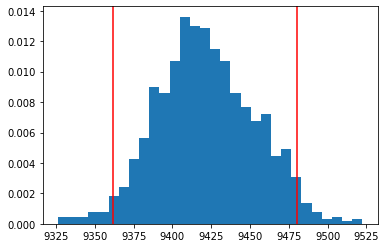

In [ ]:
plt.hist(male_purchasers_sample_means,bins=30,density=True)
plt.axvline(x=confidence_interval[0],c='r')
plt.axvline(x=confidence_interval[1],c='r')
plt.show()

**So, with 95% confidence we can say the femal population mean of purchase is in between 9364 to 9489**

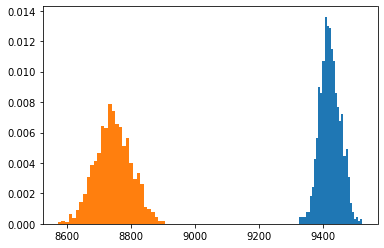

In [ ]:
plt.hist(male_purchasers_sample_means,bins=30,density=True)

plt.hist(female_purchasers_sample_means,bins=30,density=True)

plt.show()

**The confidence intervals are not overlapping and depicts women purchase is less compared to men and walmart has to improve products and services so that women purchase average will also increase**

### Condfidence interval w.r.t Marital status

In [ ]:
# w.r.t Marital status

In [ ]:
# Unmarried customers sample mean

In [ ]:
unmarried_customers=walmart_df[walmart_df['Marital_Status']==0]

In [ ]:
unmarried_purchasers_cost_details=(unmarried_customers['Purchase'])

In [ ]:
size=1000
unmarried_purchasers_sample_means=np.zeros(size)
for i in range(size):
  bootstrapped_sample=unmarried_purchasers_cost_details.sample(unmarried_customers.shape[0],replace=True)
  sample_mean=np.mean(bootstrapped_sample)
  unmarried_purchasers_sample_means[i]=sample_mean

In [ ]:
confidence_interval=np.percentile(unmarried_purchasers_sample_means,[2.5,97.5])
print(confidence_interval)

[9167.77466615 9311.95469381]


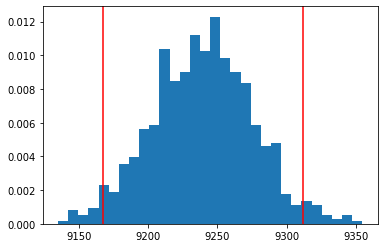

In [ ]:
plt.hist(unmarried_purchasers_sample_means,bins=30,density=True)
plt.axvline(x=confidence_interval[0],c='r')
plt.axvline(x=confidence_interval[1],c='r')
plt.show()

**So, with 95% confidence we can say the unmarried population mean of purchase is in between 9174 to 9309**

In [ ]:
# married customers sample mean

In [ ]:
married_customers=walmart_df[walmart_df['Marital_Status']==1]

In [ ]:
married_purchasers_cost_details=(married_customers['Purchase'])

In [ ]:
size=1000
married_purchasers_sample_means=np.zeros(size)
for i in range(size):
  bootstrapped_sample=married_purchasers_cost_details.sample(married_customers.shape[0],replace=True)
  sample_mean=np.mean(bootstrapped_sample)
  married_purchasers_sample_means[i]=sample_mean

In [ ]:
confidence_interval=np.percentile(married_purchasers_sample_means,[2.5,97.5])
print(confidence_interval)

[9220.92801037 9382.61772587]


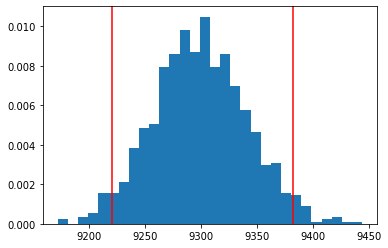

In [ ]:
plt.hist(married_purchasers_sample_means,bins=30,density=True)
plt.axvline(x=confidence_interval[0],c='r')
plt.axvline(x=confidence_interval[1],c='r')
plt.show()

**So, with 95% confidence we can say the married population mean of purchase is in between 9216 to 9380**

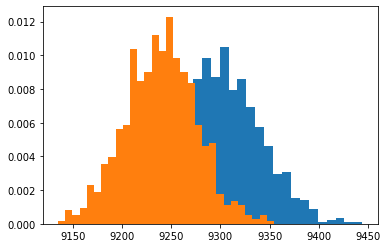

In [ ]:
plt.hist(married_purchasers_sample_means,bins=30,density=True)

plt.hist(unmarried_purchasers_sample_means,bins=30,density=True)

plt.show()

**The confidence intervals are overlapping and depicts married purchase is slightly more comapred to unmarried**

### Confidence interval w.r.t Age

[8659.37726471 9325.99976471]


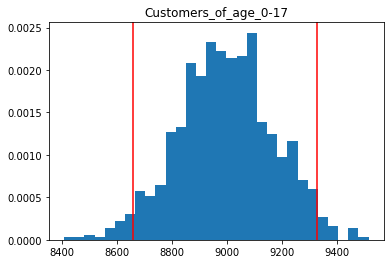

[9012.60206359 9262.79524249]


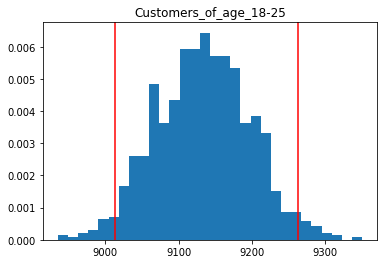

[9162.75099185 9333.09113366]


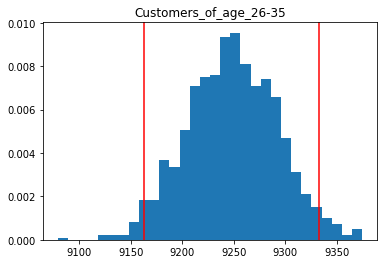

[9250.71810483 9486.02968682]


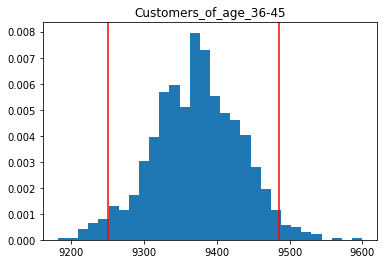

[8961.16722344 9319.6207375 ]


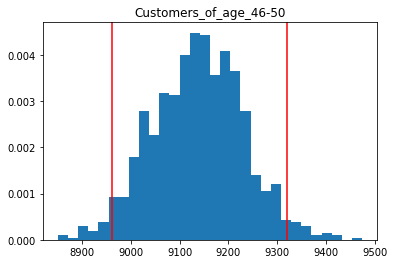

[9346.42368584 9755.76779801]


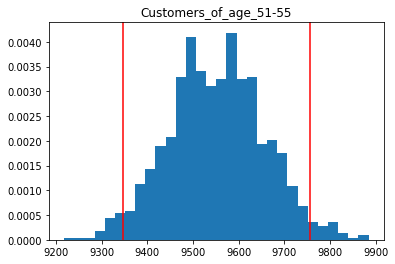

[9139.44654914 9640.07473743]


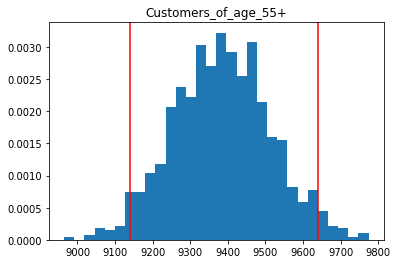

In [ ]:
for j in sorted(walmart_df["Age"].unique()):
  customers=walmart_df[walmart_df['Age']==j]
  customers_purchase_cost_details=customers['Purchase']
  size=1000
  customers_purchase_sample_means=np.zeros(size)
  for i in range(size):
    bootstrapped_sample=customers_purchase_cost_details.sample(customers.shape[0],replace=True)
    sample_mean=np.mean(bootstrapped_sample)
    customers_purchase_sample_means[i]=sample_mean

  confidence_interval=np.percentile(customers_purchase_sample_means,[2.5,97.5])
  print(confidence_interval)

  plt.hist(customers_purchase_sample_means,bins=30,density=True)
  plt.axvline(x=confidence_interval[0],c='r')
  plt.axvline(x=confidence_interval[1],c='r')
  plt.title('Customers_of_age_'+j)
  plt.show()




**Here, w.r.t ages the distribution is overlapping and the age group of 0-17 is having higher dispersion and having the low extreme of 8660 where as age group of 51-55 is having the higher extreme of 9757**

##5.Final Insights

**1. The average purchase cost is approximated to normal distribution and it follows the same almost with every category or variable.**

**2. In Gender category male are purchasing more than female with a confidence level of 95 % on the population.**

**3. In Maritatl status category also the married average purchase is slightly more and while predicting the average purchase on population with a 95 % confidence interval it is overlapping with unmarried average purchase. So, there is no much variation in this category.**

**4. In Age category, the 51-55 is having higher average purchase.**


##6. Recommendations

**1. With the analysis we can find that women purchase is lesser and if we bring out the new products or variants, purchase sale can be increased**

**2. In the same way if we increase the variety of the products sale in the respective age group, their average purchase can also be increased**

**3. One major recommendation is to increase the price of the product slightly that is having highest sale and decrease the prices of the products that are high in price so that the net purchase will be high**

## Extra

In [ ]:
walmart_df.groupby(['Age','Gender','Product_Category','Occupation','Marital_Status','Stay_In_Current_City_Years','City_Category'],as_index=False)['Purchase'].count().sort_values('Purchase',ascending=False)

,Age,Gender,Product_Category,Occupation,Marital_Status,Stay_In_Current_City_Years,City_Category,Purchase
36664,18-25,M,5.0,4.0,0.0,1,B,76
34144,18-25,M,1.0,4.0,0.0,1,B,63
36673,18-25,M,5.0,4.0,0.0,4+,B,62
56704,26-35,M,1.0,0.0,0.0,1,B,56
56705,26-35,M,1.0,0.0,0.0,1,C,53
...,...,...,...,...,...,...,...,...
53388,26-35,F,13.0,15.0,1.0,1,A,0
53389,26-35,F,13.0,15.0,1.0,1,B,0
53390,26-35,F,13.0,15.0,1.0,1,C,0
53391,26-35,F,13.0,15.0,1.0,2,A,0


In [ ]:

walmart_df.groupby(['Age','Gender','Product_Category','Occupation','Marital_Status','Stay_In_Current_City_Years','City_Category'],as_index=False)['Purchase'].mean().sort_values('Purchase',ascending=False)

,Age,Gender,Product_Category,Occupation,Marital_Status,Stay_In_Current_City_Years,City_Category,Purchase
153110,55+,M,10.0,0.0,1.0,1,C,23958.0
62738,26-35,M,10.0,12.0,0.0,2,C,23956.0
62383,26-35,M,10.0,0.0,0.0,4+,B,23948.0
85400,36-45,M,10.0,11.0,1.0,1,C,23919.0
62808,26-35,M,10.0,14.0,1.0,1,A,23913.0
...,...,...,...,...,...,...,...,...
158755,55+,M,18.0,20.0,1.0,3,B,NaN
158756,55+,M,18.0,20.0,1.0,3,C,NaN
158757,55+,M,18.0,20.0,1.0,4+,A,NaN
158758,55+,M,18.0,20.0,1.0,4+,B,NaN


**From the above table it is clear that 55+ age of male customers who are married and living in city catgeory C by buying product category 10 is having highest mean. So if we bring up new variants in this specific catgeory we can increase sale further**